# The Sparks Foundation - Data Science & Business Analytics

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

#### In this task we will try to find out the weak areas where we can work to make more profit.
### Data Set can be found on Dataset: https://bit.ly/3i4rbWl

#### Author -- Ankit Dhaka

In [1]:
#In this step we will import the required libarries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# To ignore the warnings 
import warnings as wg

In [2]:
# importing the dataset using pandas

df = pd.read_csv("SampleSuperstore.csv")

# This time to check our data and print 5 rows from our dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# to find last 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
# for find any 5 sample data rows
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
5957,Second Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Appliances,154.900,5,0.0,40.2740
896,Second Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Envelopes,15.648,2,0.2,5.0856
3571,Same Day,Home Office,United States,Seattle,Washington,98105,West,Technology,Phones,7.992,1,0.2,2.6973
9374,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Supplies,61.380,6,0.0,15.9588
6701,Standard Class,Consumer,United States,Wilson,North Carolina,27893,South,Furniture,Furnishings,163.136,4,0.2,20.3920


# Proprocessing

In [5]:
#shape of the data
df.shape

(9994, 13)

In [6]:
#columns inside the dataset

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# Number of unique values in each columns

for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [8]:
#Check for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# overall information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
#statistical overview of data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# checking for duplicate values
df.duplicated().sum()

17

In [12]:
# dropping the duplicates
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
#removing the unnecessary columns such as postal code
dataset = df.drop(['Postal Code'],axis=1)
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Visualization

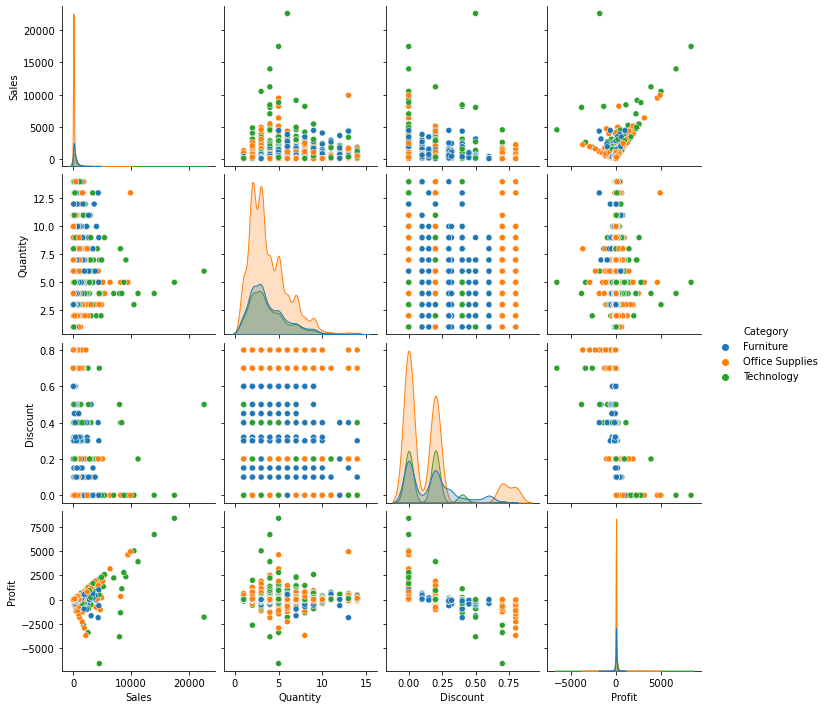

In [14]:
# visualizing the dataset as a whole using the pair plot
sns.pairplot(dataset,hue="Category")

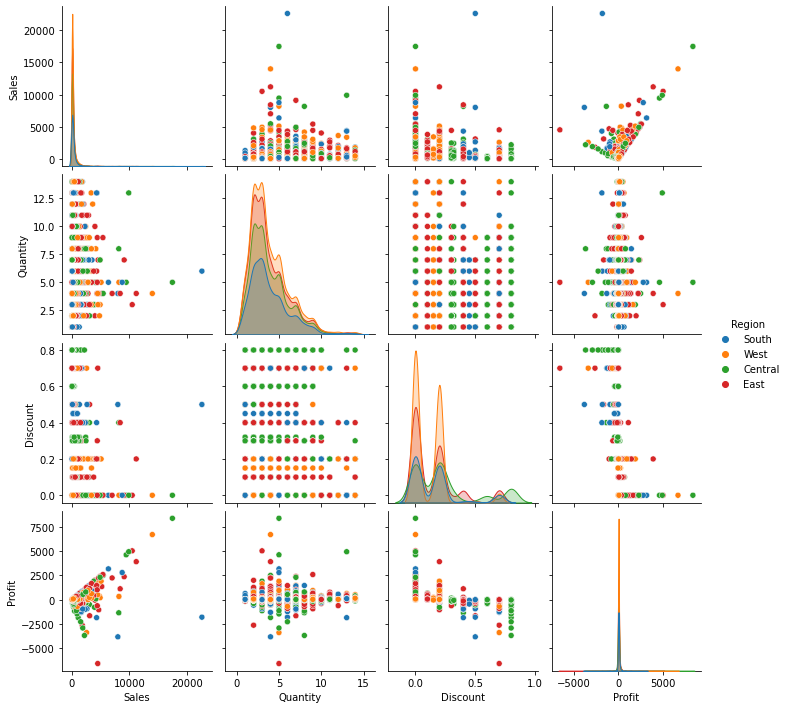

In [15]:
sns.pairplot(dataset,hue="Region")

In [16]:
#correlation between the columns

dataset.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


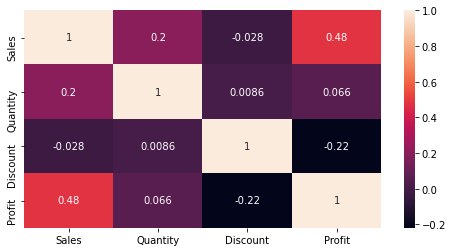

In [17]:
# finding the pairwise correlations between the columns and visualising using heatmaps
plt.figure(figsize=(8,4))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

### For above heatmap results are:

#### 1. Discount and Profit is Negative correlated.
#### 2. Quantity and Profit are less Moderately correlated.
#### 3. Sales and Profit are Moderately correlated.


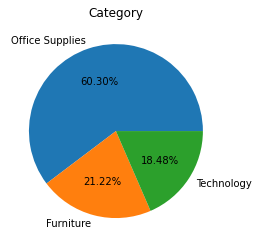

In [18]:
# Count plot of category wise Analysis
plt.figure(figsize = (4,4))
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%.2f%%')
plt.show()

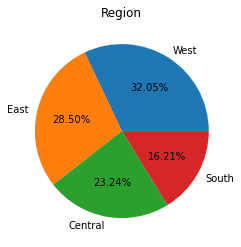

In [19]:
# Count plot of region wise distribution
plt.figure(figsize = (4,4))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index,autopct='%.2f%%')
plt.show()

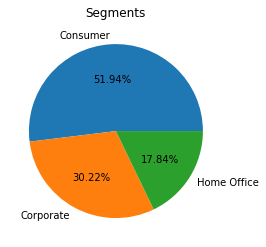

In [20]:
# Count plot of customer segments

plt.figure(figsize = (4,4))
plt.title('Segments')
plt.pie(dataset['Segment'].value_counts(), labels=dataset['Segment'].value_counts().index,autopct='%.2f%%')
plt.show()

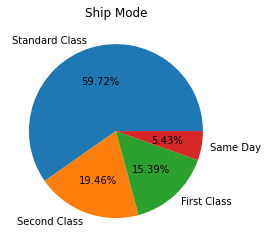

In [21]:
# Count plot of ship mode of distribution
plt.figure(figsize = (4,4))
plt.title('Ship Mode')
plt.pie(dataset['Ship Mode'].value_counts(), labels=dataset['Ship Mode'].value_counts().index,autopct='%.2f%%')
plt.show()

## Segment-wise analysis of Profit, Sale & Discount

In [22]:
dataset.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


## Quantity-Wise analysis of Profit, Sales & Discount

In [23]:
dataset.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Region-wise ordered Quantity')

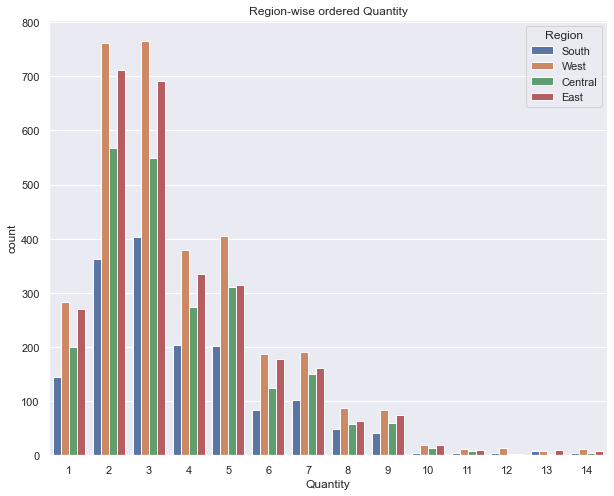

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=dataset['Quantity'], hue=dataset['Region'])
plt.title('Region-wise ordered Quantity')

Text(0.5, 1.0, 'Region-wise ordered product categories')

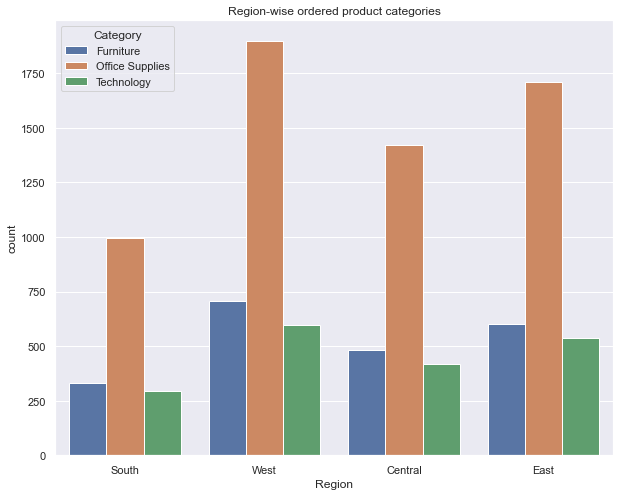

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=dataset['Region'], hue=dataset['Category'])
plt.title('Region-wise ordered product categories')

#### We can see in above graph west region is orderd more all kind of products and south region is our least buyer.

### Category-Wise analysis of Profit, Sales & Discount

In [26]:
dataset.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


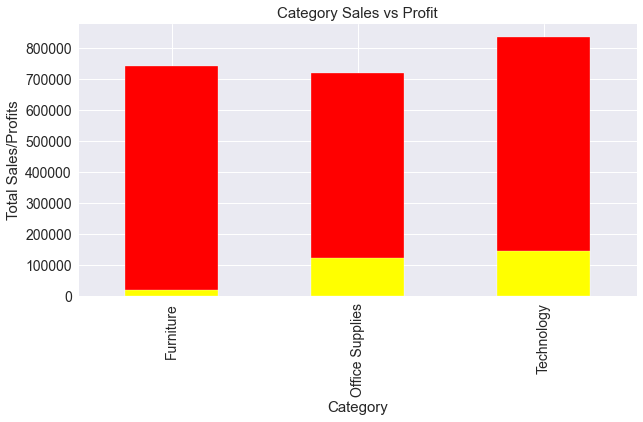

In [54]:
# computing top categories in terms of sales
s = dataset.groupby("Category").Sales.sum()

# computing top categories in terms of profit 
p = dataset.groupby("Category").Profit.sum()

# plotting to see it visually
plt.style.use('seaborn')
s.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color='red')
p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='yellow')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Category Sales vs Profit",fontsize = 15)
plt.show()

### Sub-Category Wise analysis of Profit, Sales & Discount

In [27]:
dataset.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sub-Category')

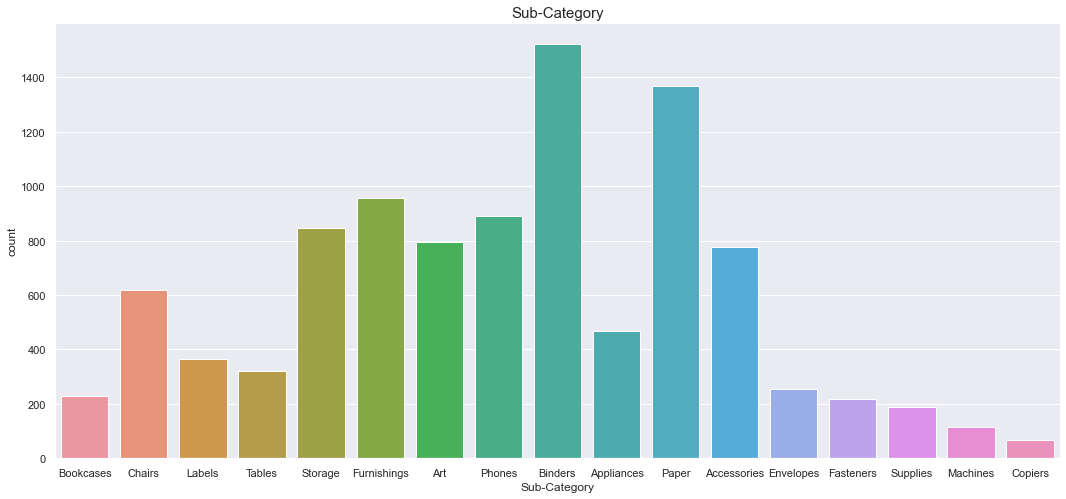

In [28]:
# Now turn to draw a graph of sub-category

plt.figure(figsize=(18,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=15)

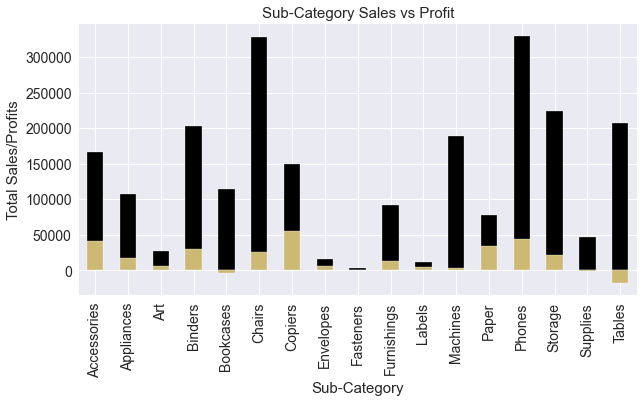

In [53]:
# computing top sub-categories in terms of sales

sc = dataset.groupby("Sub-Category").Sales.sum()

# computing top sub-categories in terms of profit
scp = dataset.groupby("Sub-Category").Profit.sum()

# plotting to see it visually
plt.style.use('seaborn')
sc.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color = 'black')
scp.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'y')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

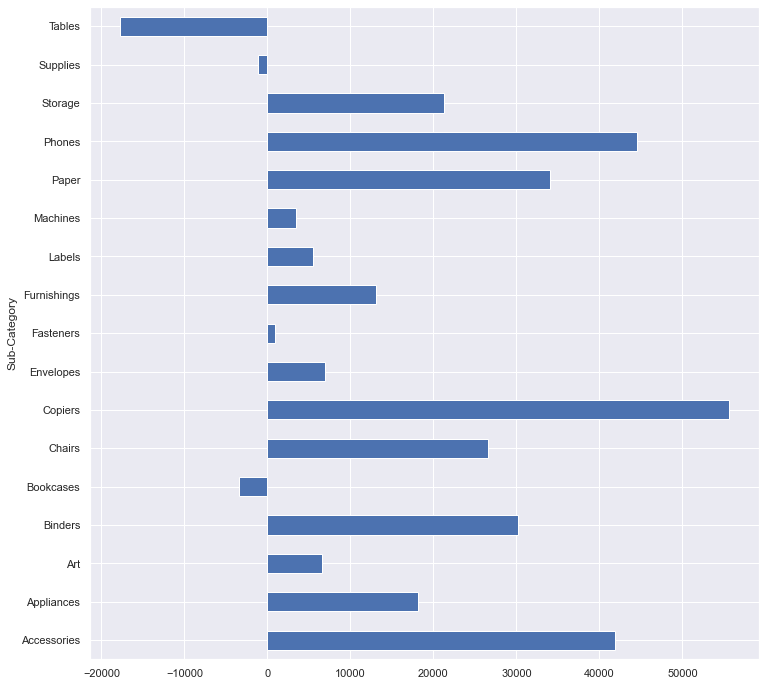

In [41]:
# A more detailed view
plt.figure(figsize=(12,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum()
statewise.plot.barh() 
# h for horizontal

#### The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discount Graph with respect of count (Quantity)')

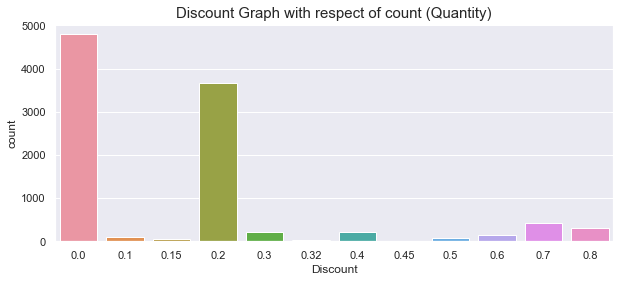

In [30]:

plt.figure(figsize=(10,4))
sns.countplot(df['Discount'])
plt.title('Discount Graph with respect of count (Quantity)',fontsize=15)

C:\Users\ankus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

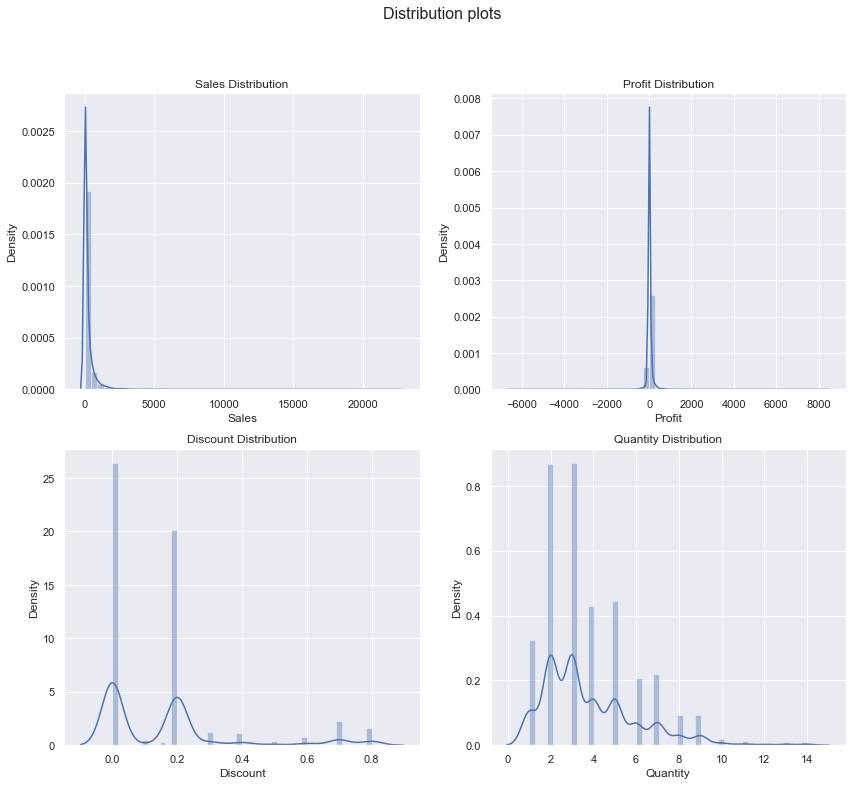

In [31]:
fig,axes = plt.subplots(2,2,figsize=(14,12))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
axes[0][0].set_title('Sales Distribution')
axes[0][1].set_title('Profit Distribution')
axes[1][0].set_title('Discount Distribution')
axes[1][1].set_title('Quantity Distribution')
plt.show()

### In the above graph, Sales distribution is rightly skewed and profit distribution is seems normal skewed.

In [32]:
# State- wise Analysis
new_df=dataset['State'].value_counts()
new_df.head()

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

In [33]:
min=dataset['State'].value_counts().min()
min

1

In [34]:
max=dataset['State'].value_counts().max()
max

2001

### State - Wise analysis of Profit, Sales & Discount

In [35]:
dataset.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


Text(0.5, 1.0, 'states-wise Dealings')

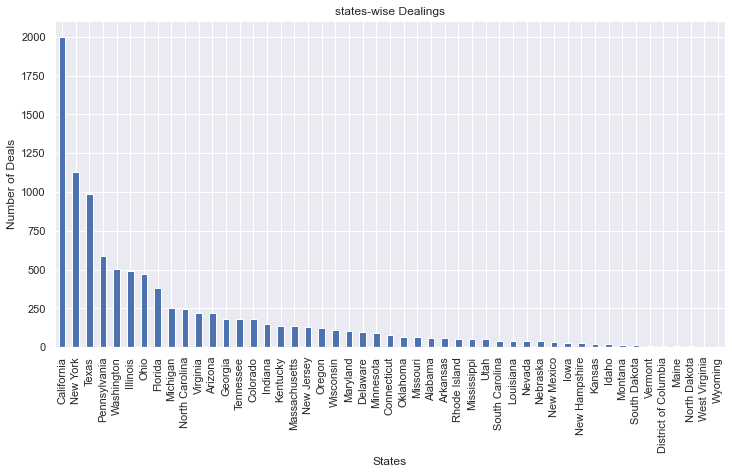

In [36]:
new_df.plot(kind='bar',figsize=(12,6))
plt.ylabel('Number of Deals')
plt.xlabel('States')
plt.title('states-wise Dealings')

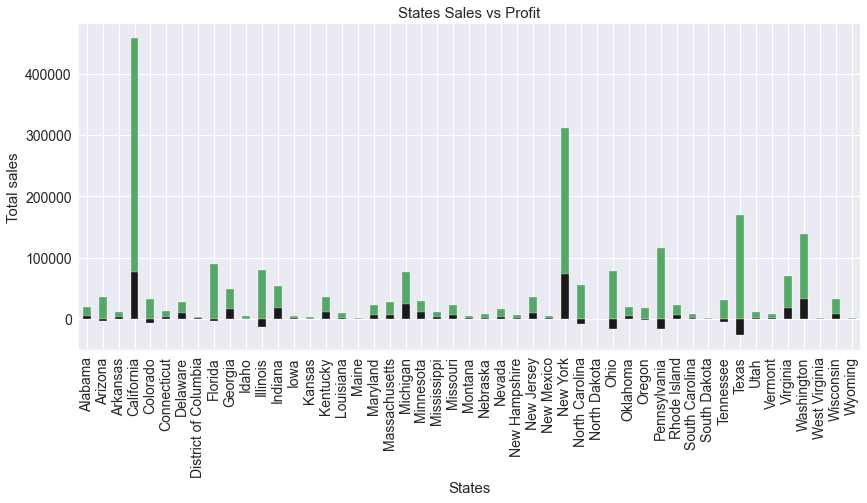

In [63]:

# computing states in terms of sales 
ss = dataset.groupby("State").Sales.sum()

# computing states in terms of profit 
ps = dataset.groupby("State").Profit.sum()

plt.style.use('seaborn')
ss.plot(kind = 'bar',figsize = (14,6),fontsize = 14,color='g')
ps.plot(kind = 'bar',figsize = (14,6),fontsize = 14, color = 'k')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("States Sales vs Profit",fontsize = 15)
plt.show()

#  --------------------------------------- Thank you ----------------------------------------- 

# Conclusion :
## 1. Weak Areas - 
###### i) We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
###### ii) Increase sales more in the east as profit is more. 
###### iii) Need to give some discount and other offer in state (colorado, texas, north carolina,ohio) because there is sale is fine but no profit.

## 2. Other Findings :
###### i) Over Less quantity of products also the sales were high.
###### ii) The features Profit and Discounts are highly related.
###### iii) The Home Office provides highest sales followed by Corporate by a slight variation.
###### iv) We should concentrate on the states like 'New York' and 'California' to make more profits.
